In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing or loading the dataset
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Observations:

1) There are 12 coulmns, out of which we have to predict Happiness score (We can drop 1 column i.e, Happiness rank at it is based on Happiness score in descending order)

2) Out of which Country and region are nominal catergorical type of feature

3) Remaining are of continuous type of data

4) Label or target is Happiness score which has to be predicted and is of continuous type of data

5) Therefore we need to use regression method while building prediction model

In [3]:
#Checing data types
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [4]:
df.shape

(158, 12)

In [5]:
#Checking any null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#Checking value counts of each category in catergorical/nominal type feature columns
print(df['Country'].value_counts(),'\n')
print(df['Region'].value_counts(),'\n')

Germany         1
Burkina Faso    1
Sweden          1
Mexico          1
Serbia          1
               ..
Liberia         1
Georgia         1
Bolivia         1
Slovenia        1
Bulgaria        1
Name: Country, Length: 158, dtype: int64 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64 



In [7]:
#Cross checking that Country column has unique entries
df['Country'].nunique()

158

In [8]:
list(set(df['Region'].values))

['Latin America and Caribbean',
 'Australia and New Zealand',
 'Sub-Saharan Africa',
 'Eastern Asia',
 'Southeastern Asia',
 'Central and Eastern Europe',
 'North America',
 'Middle East and Northern Africa',
 'Western Europe',
 'Southern Asia']

There are 10 no of region categorically

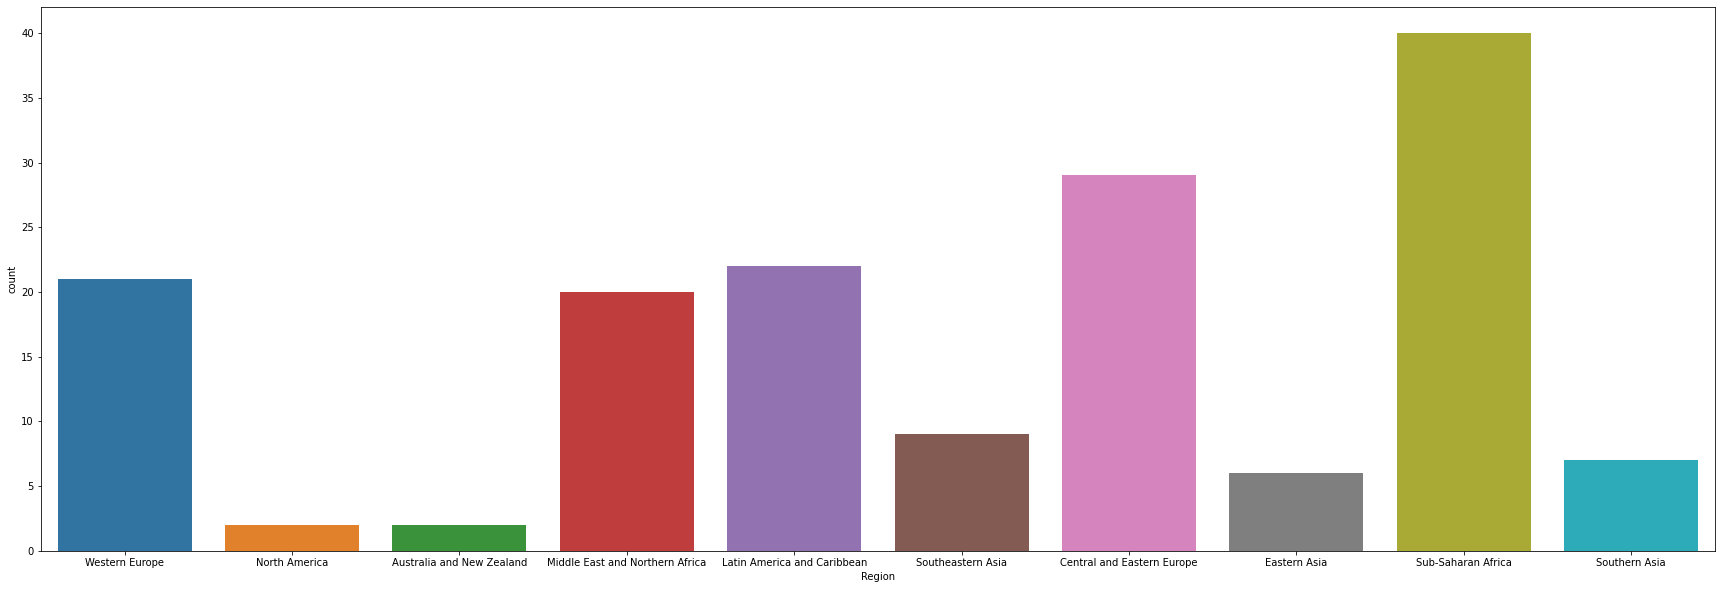

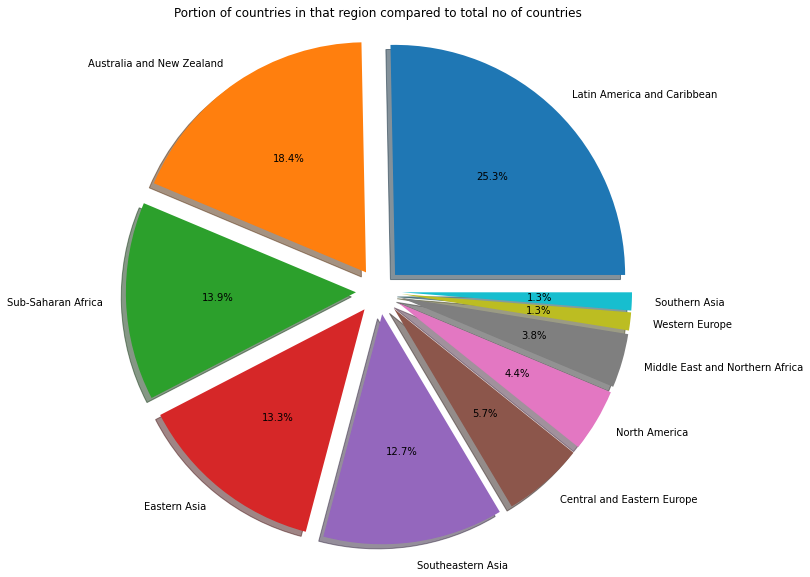

In [9]:
#Countplot for vizualization of value counts of nominal data
plt.figure(figsize=(30,10))
sns.countplot(df['Region'])
plt.show()

#vizualization of no of countries in the region using pie chart
plt.figure(figsize=(10,10))
data = list(df['Region'].value_counts())
plt.pie(data, labels= list(set(df['Region'].values)), autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True)
plt.axis('equal')
plt.title('Portion of countries in that region compared to total no of countries')
plt.show()

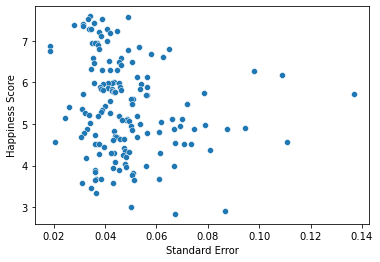

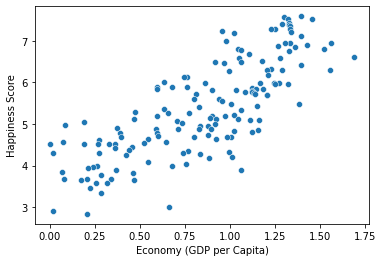

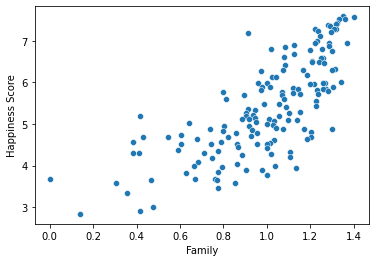

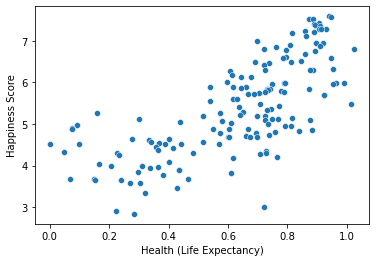

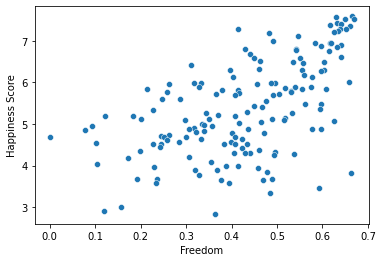

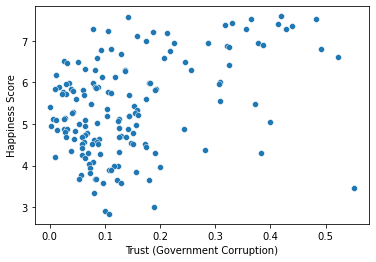

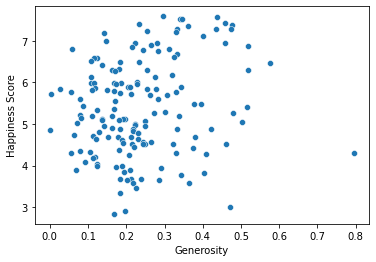

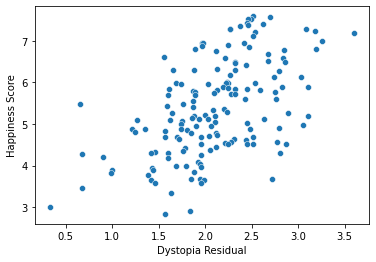

In [10]:
#Scatter plot to vizualize continuos features relationship with target variable
y = df['Happiness Score']
df_cont = ['Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']

for i in df_cont:
    x = df[i]
    sns.scatterplot(x, y, data=df)
    plt.show()

Observe that except for standard error all other feature columns showing some positive relationship with target  variable

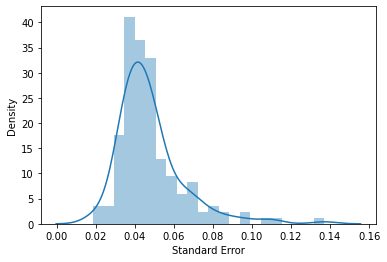

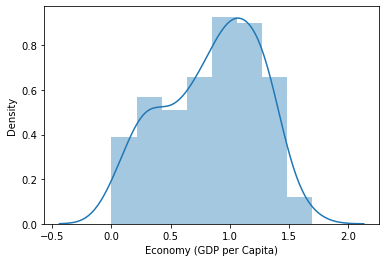

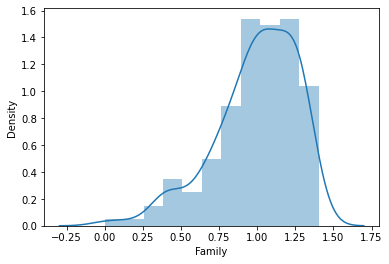

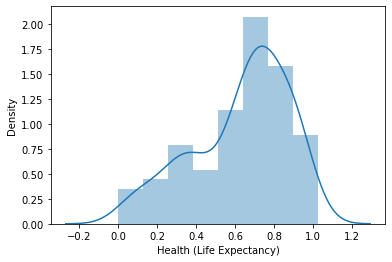

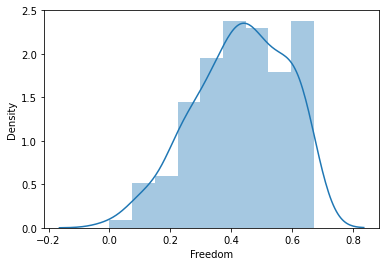

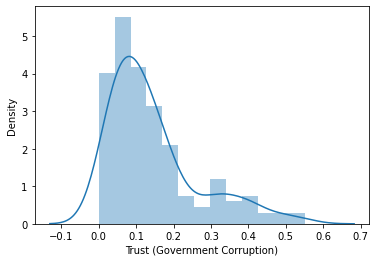

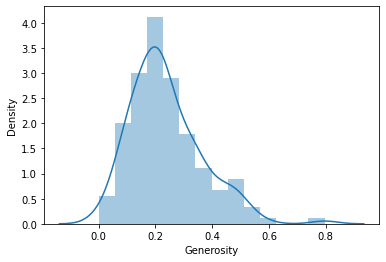

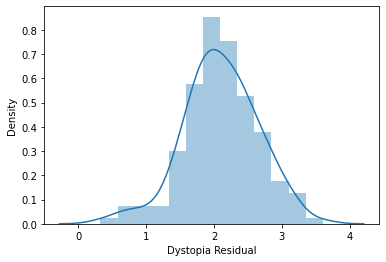

In [11]:
#Checking the distribution of continuous data

for i in df_cont:
    sns.distplot(df[i], kde=True)
    plt.show()

All continuous data is normally distributed with some skewness

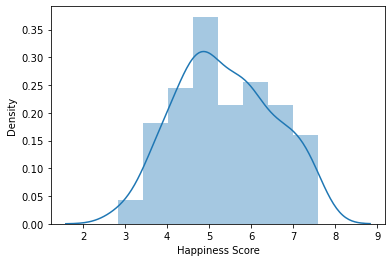

In [12]:
#Checking the distribution of continuous target data

sns.distplot(df['Happiness Score'], kde=True)
plt.show()

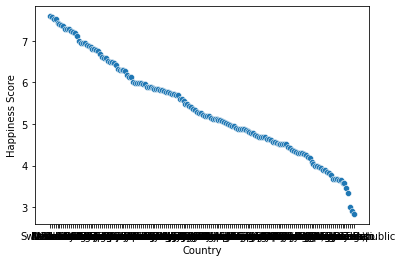

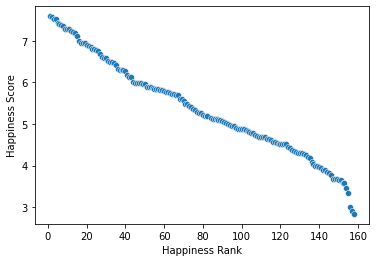

In [13]:
sns.scatterplot(df['Country'], df['Happiness Score'])
plt.show()

sns.scatterplot(df['Happiness Rank'], df['Happiness Score'])
plt.show()

Since these two data doesnot help to determine or predict target variable we can drop these columns from features

In [14]:
df = df.drop(['Country', 'Happiness Rank'], axis=1)
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [15]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Region'] = enc.fit_transform(df['Region'].values.reshape(-1,1))       
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [16]:
df['Region'].value_counts()

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
0     2
5     2
Name: Region, dtype: int64

There are 10 no of region categorically

In [17]:
#Statistical summary
df.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [18]:
df.corr()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


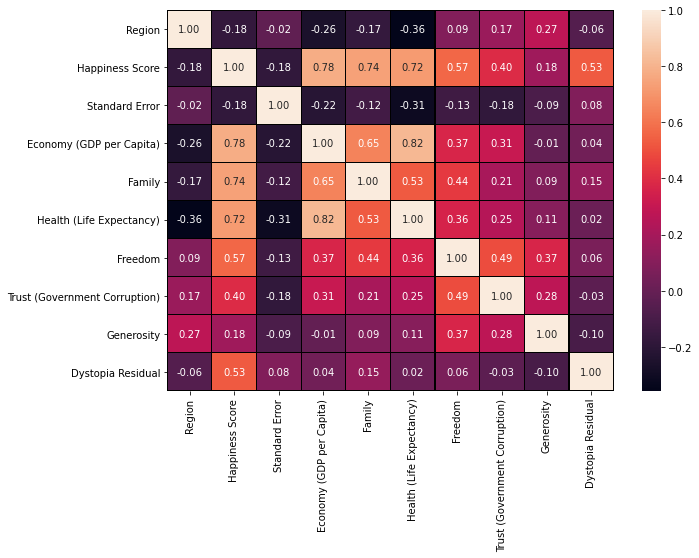

In [19]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

We can observe strong correlation between independent variables themselves, this causes multicollinearity

Need to check VIF values and handle multicollinearity before training the model

1) Health and Economy 0.82

2) Family and economy 0.65

In [20]:
#Sorting descending values of correlation data of target variable
df.corr()['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region                          -0.176791
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

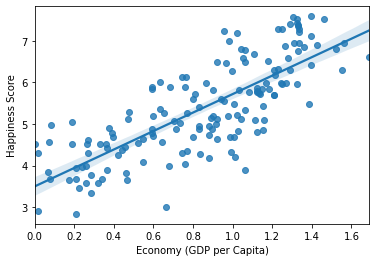

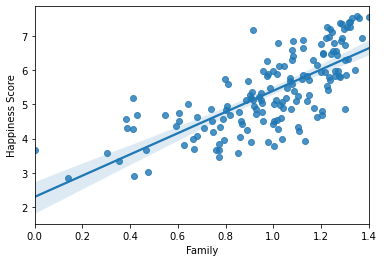

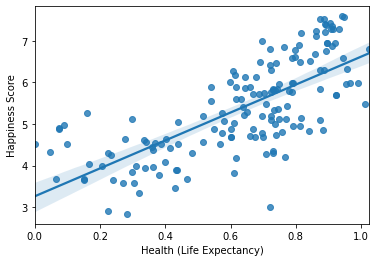

In [21]:
#Scatter plot to vizualize continuos features relationship with target variable
b = df['Happiness Score']
a = ['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)']

for i in a:
    x = df[i]
    sns.regplot(x, b, data=df)
    plt.show()

The above 3 variables have strong +ve correlation with target that is >0.7

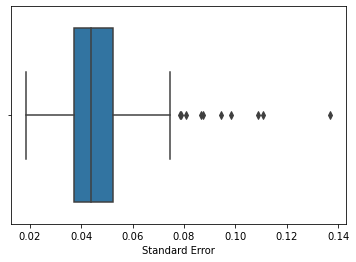

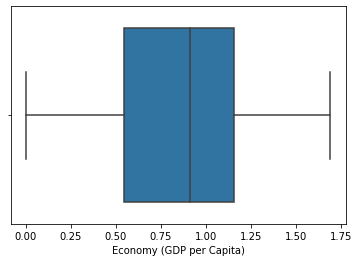

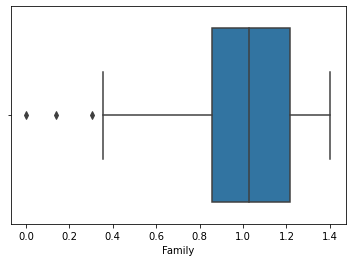

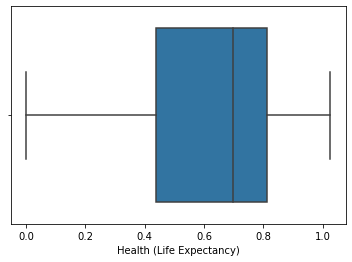

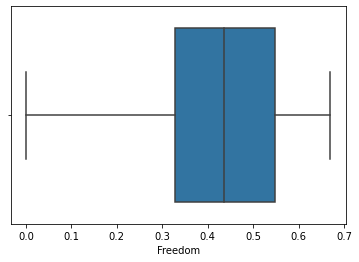

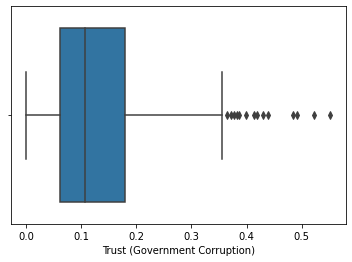

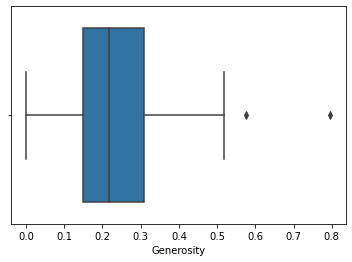

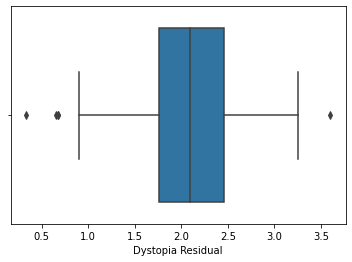

In [22]:
#Checking outliers in the data (continuous features only)
df_cont = ['Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']

for i in df_cont:
    sns.boxplot(df[i])
    plt.show()

'Standard Error', 'Family', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual' 

These above features has outliers

In [23]:
#Removing of outliers by zscore method
print(df.shape)

from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

df_new.head()

(158, 10)
(149, 10)


,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
# Data loss %

data_lost = (158-149)*100/158
data_lost

5.69620253164557

In [25]:
#Seperate feature and target columns
x = df_new.drop(columns=['Happiness Score'])
y = df_new['Happiness Score']

In [26]:
x.columns

Index(['Region', 'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [27]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[4.554356939404074,
 9.109207755071136,
 24.835918167603086,
 30.36328885645416,
 26.359570512875557,
 16.907727600581406,
 3.7716248462412203,
 6.99576021863747,
 14.52273562552915]

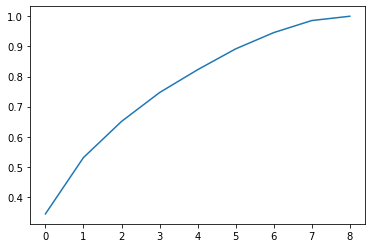

In [28]:
#PCA technique to handle multicollinearity

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_new = scaler.fit_transform(x)

pca = PCA()
pca.fit_transform(x_new)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

The explained_variance_ratio_ graph is saturating at approximately n = 8 from the above graph

In [29]:
pca = PCA(n_components=8)
new = pca.fit_transform(x)
PC = pd.DataFrame(new, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
x = PC

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print('VIF = ',vif,'\n')

print('skewness: \n',x.skew())

VIF =  [1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002] 

skewness: 
 PC1    0.099183
PC2   -0.033042
PC3   -0.050148
PC4    0.335320
PC5    0.241154
PC6    0.451419
PC7    0.387132
PC8    0.269626
dtype: float64


Thus problem of multicollinearity resolved and also no skewness present in x data, since its already std scaled

In [30]:
# Linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,3) == round(r2_score(yt,predyt)*100,3):
             print('At RS',i,'Model preforms well')
             print('Test score =',(r2_score(yt,predyt)*100),'\n')

At RS 0 Model preforms well
Test score = 99.99997724241058 

At RS 1 Model preforms well
Test score = 99.99997321849663 

At RS 2 Model preforms well
Test score = 99.99998640937338 

At RS 3 Model preforms well
Test score = 99.99998333606574 

At RS 4 Model preforms well
Test score = 99.99998122450906 

At RS 5 Model preforms well
Test score = 99.99998013164439 

At RS 6 Model preforms well
Test score = 99.99997420361088 

At RS 7 Model preforms well
Test score = 99.99996081873934 

At RS 8 Model preforms well
Test score = 99.99998869560714 

At RS 9 Model preforms well
Test score = 99.99998241624846 

At RS 10 Model preforms well
Test score = 99.99998255897701 

At RS 11 Model preforms well
Test score = 99.99998394537684 

At RS 12 Model preforms well
Test score = 99.99998604750026 

At RS 13 Model preforms well
Test score = 99.99998590558485 

At RS 14 Model preforms well
Test score = 99.99998780813252 

At RS 15 Model preforms well
Test score = 99.99996782695428 

At RS 16 Model pre

In [31]:
xtr, xt, ytr, yt = train_test_split(x,y, random_state=160,test_size=0.2)
lr.fit(xtr,ytr)
predytr = lr.predict(xtr)
predyt = lr.predict(xt)
print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.9999998380976765 

Mean absolute error = 0.0003599924097406504 

Mean squared error = 2.3758637461265213e-07 



In [32]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score

predyt = lr.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(lr,x,y,cv=3)
lsc = lsc.mean()
print('At CV =',3)
print('CV score =',lsc)
print('r2_score of test =',lss)

At CV = 3
CV score = 0.9999982456408892
r2_score of test = 0.9999998380976765


Here CV score almost equal to test score, so no problem of overfitting

Let us try other algorithms and Hyper parameter tuning (not required)

In [33]:
# Lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

ls = Lasso()

parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 'random_state':list(range(0,20))}

gsv = GridSearchCV(ls, parameters)

gsv.fit(xtr,ytr)

print(gsv.best_estimator_)

Lasso(alpha=0.0001, random_state=0)


In [34]:
ls = Lasso(alpha=0.0001, random_state=0)

ls.fit(xtr,ytr)

predyt = ls.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.9999979149048583 

Mean absolute error = 0.0014819865331234658 

Mean squared error = 3.059809053650632e-06 



In [35]:
# Random forest regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

parameters = {'n_estimators':[50,100,150,200], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'max_features' : ["auto", "sqrt", "log2"]}

gsv = GridSearchCV(rf, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=200)


In [36]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=50)

rf.fit(xtr,ytr)

predyt = rf.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.9454508486609379 

Mean absolute error = 0.21936233333333358 

Mean squared error = 0.08004909886333336 



In [37]:
# Gradient boosting regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters = {'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'], 
              'n_estimators':[50,100,150,200], 
              'max_depth' : [3,4,5,6,7]}

gsv = GridSearchCV(gbr, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mae', n_estimators=150)


In [38]:
gbr = GradientBoostingRegressor(n_estimators=200)

gbr.fit(xtr,ytr)

predyt = gbr.predict(xt)

testscore = r2_score(yt, predyt)

print('Test score =',(r2_score(yt,predyt)),'\n')
print('Mean absolute error =',(mean_absolute_error(yt,predyt)),'\n')
print('Mean squared error =',(mean_squared_error(yt,predyt)),'\n')

Test score = 0.9681913852048313 

Mean absolute error = 0.15583249340998684 

Mean squared error = 0.046678103837351555 



Linear regression and Lasso model are giving best result on basis of R2 score, MSE and MAE

In [39]:
import pickle
filename='happiness.pkl'
pickle.dump(ls,open(filename,'wb'))